In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import nltk

In [3]:
train = pd.read_csv('imdb_small.csv')

map_dict = {'negative':0,'positive':1}
train =train.replace({'sentiment':map_dict})  

# 1. Basic EDA

## Number of Words


In [4]:
train['word_count'] = train['review'].apply(lambda x: len(x.split(" ")))
train[['review','word_count']].head()

,review,word_count
0,I have to differ from the other comments poste...,43
1,I saw this movie with low expectations and was...,137
2,Taran Adarsh a reputed critic praised such a d...,152
3,When I first heard that the subject matter for...,117
4,"With the release of Peter Jackson's famed ""Lor...",591


## Number of characters

In [5]:
train['character_count']=train['review'].apply(lambda x: len(x))
train[['review','character_count']].head()

,review,character_count
0,I have to differ from the other comments poste...,244
1,I saw this movie with low expectations and was...,701
2,Taran Adarsh a reputed critic praised such a d...,824
3,When I first heard that the subject matter for...,628
4,"With the release of Peter Jackson's famed ""Lor...",3498


## Average word length

In [6]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

train['avg_word_len'] = train['review'].apply(lambda x: avg_word(x))
train[['review','avg_word_len']].head()

,review,avg_word_len
0,I have to differ from the other comments poste...,4.697674
1,I saw this movie with low expectations and was...,4.124088
2,Taran Adarsh a reputed critic praised such a d...,4.427632
3,When I first heard that the subject matter for...,4.376068
4,"With the release of Peter Jackson's famed ""Lor...",4.920474


## Counting number of stopwords

In [7]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def countstopwords(sentence):
    count = 0
    for i in (sentence.split()):
        if i in stop_words:
            count +=1 
    return count

train['stopwords'] = train['review'].apply(lambda x: countstopwords(x))
train[['review','stopwords']].head()

,review,stopwords
0,I have to differ from the other comments poste...,17
1,I saw this movie with low expectations and was...,63
2,Taran Adarsh a reputed critic praised such a d...,62
3,When I first heard that the subject matter for...,44
4,"With the release of Peter Jackson's famed ""Lor...",259


## Number of Special Characters

## Number of numerics

In [8]:
train['numerics'] = train['review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
train[['review','numerics']].head()

,review,numerics
0,I have to differ from the other comments poste...,0
1,I saw this movie with low expectations and was...,2
2,Taran Adarsh a reputed critic praised such a d...,0
3,When I first heard that the subject matter for...,0
4,"With the release of Peter Jackson's famed ""Lor...",2


## Number of Uppercase words

In [9]:
train['upper'] = train['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
train[['review','upper']].head()

,review,upper
0,I have to differ from the other comments poste...,2
1,I saw this movie with low expectations and was...,5
2,Taran Adarsh a reputed critic praised such a d...,1
3,When I first heard that the subject matter for...,10
4,"With the release of Peter Jackson's famed ""Lor...",6


# 2. Cleaning our Data (Noise Removal)

## 2.1. Removing line breaks

In [10]:
train['review'] = train['review'].apply(lambda x: x.replace('<br />','.'))

##  2.2. Removing Punctuations

In [11]:
train['review'] = train['review'].str.replace('[^\w\s]','')
train['review'].head()

# import string
# df['patterns']= df['patterns'].apply(lambda x: ' '.join(x for x in x.split() if x not in string.punctuation))
# df['patterns']= df['patterns'].str.replace('[^\w\s]','')

0    I have to differ from the other comments poste...
1    I saw this movie with low expectations and was...
2    Taran Adarsh a reputed critic praised such a d...
3    When I first heard that the subject matter for...
4    With the release of Peter Jacksons famed Lord ...
Name: review, dtype: object

##  2.3. Number to words

In [12]:
# After converting we get '-' sometimes - so we need to do punctuation removal again...
import num2words
num2words.num2words(834)

'eight hundred and thirty-four'

In [13]:
def convertnum2words (sentence):
    new_sentence = sentence
    for i in sentence.split():
        if i.isdigit():
            sentence = sentence.replace(i,num2words.num2words(int(i)))
    return sentence


train['review'] = train['review'].apply(lambda x: convertnum2words(x))
train['review'] = train['review'].str.replace('-',' ')
train['review'].head()

0    I have to differ from the other comments poste...
1    I saw this movie with low expectations and was...
2    Taran Adarsh a reputed critic praised such a d...
3    When I first heard that the subject matter for...
4    With the release of Peter Jacksons famed Lord ...
Name: review, dtype: object

## 2.4. Lower Case
- If not done the model will treat 'Movie' and 'movie' differently.

In [14]:
train['review'] = train['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
train['review'].head()

0    i have to differ from the other comments poste...
1    i saw this movie with low expectations and was...
2    taran adarsh a reputed critic praised such a d...
3    when i first heard that the subject matter for...
4    with the release of peter jacksons famed lord ...
Name: review, dtype: object

In [15]:
"with the release of peter jackson's ! famed 'lo'".replace('[^\w\s]','')

"with the release of peter jackson's ! famed 'lo'"

## 2.5. Removing Stopwords

In [16]:
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
train['review'].head()

0    differ comments posted amid sporadic funny mom...
1    saw movie low expectations disappointed bad ac...
2    taran adarsh reputed critic praised dubba movi...
3    first heard subject matter checking self orche...
4    release peter jacksons famed lord rings trilog...
Name: review, dtype: object

## Stemming - Instead of this we will use Lemmatization

In [17]:
from nltk.stem import PorterStemmer
porterstem = PorterStemmer()
train['review'][:5].apply(lambda x: " ".join([porterstem.stem(word) for word in x.split()]))

0    differ comment post amid sporad funni moment l...
1    saw movi low expect disappoint bad actual funn...
2    taran adarsh reput critic prais dubba movieth ...
3    first heard subject matter check self orchestr...
4    releas peter jackson fame lord ring trilog eve...
Name: review, dtype: object

## 2.6. Lemmatization
 - We wont use stemming coz it is just cutting of words to it's root where in most cases we will end up with meaningless words.
 - While in Lemmatization we wil for word (root) with meaning (present in dictionary).

In [18]:
from textblob import Word

train['review'] = train['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
train['review'].head()

0    differ comment posted amid sporadic funny mome...
1    saw movie low expectation disappointed bad act...
2    taran adarsh reputed critic praised dubba movi...
3    first heard subject matter checking self orche...
4    release peter jackson famed lord ring trilogy ...
Name: review, dtype: object

## Visualising common words (excluding stop words) for both sentiments seperately
 - Words like 'movie' and 'film' occur commonly in both the classes (sentiments) so classifying a review based on these kind of words is impossible.
 - Note that the word 'good' occurs in both classes pretty commonly while the word 'bad' occurs only in the negative class!
 - Therefore we should delete the word 'good' and keep the word 'bad'

In [19]:
commonword_neg = pd.Series(' '.join(train[train.sentiment == 0]['review']).split()).value_counts()[:40]
commonword_pos = pd.Series(' '.join(train[train.sentiment == 1]['review']).split()).value_counts()[:40]

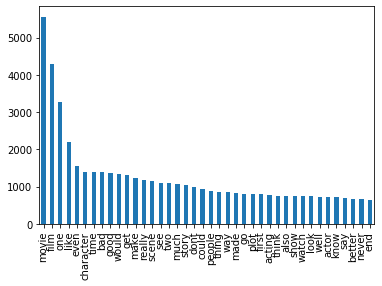

In [20]:
commonword_neg.plot(kind='bar')

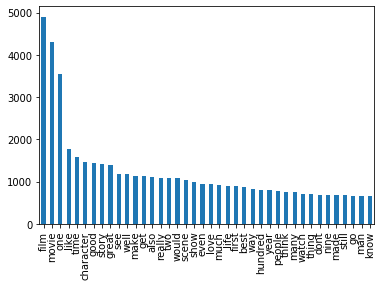

In [21]:
commonword_pos.plot(kind='bar')

In [22]:
common = []
for word in (commonword_pos.index):
    if word in (commonword_neg.index):
        common.append(word)

## 2.7. Common word removal

In [23]:
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in common))
train['review'].head()

0    differ comment posted amid sporadic funny mome...
1    saw low expectation disappointed bad actually ...
2    taran adarsh reputed critic praised dubba movi...
3    heard subject matter checking self orchestrate...
4    release peter jackson famed lord ring trilogy ...
Name: review, dtype: object

## 2.8. Rare words removal
Removing words which occured only once in the whole corpus

In [24]:
rarewords = pd.Series(' '.join(train['review']).split()).value_counts()
rarewords = rarewords[rarewords==1]

rarewords = list(rarewords.index)
train['review'] = train['review'].apply(lambda x: " ".join(x for x in x.split() if x not in rarewords))
train['review'].head()

0    differ comment posted amid sporadic funny mome...
1    saw low expectation disappointed bad actually ...
2    reputed critic praised moviethe weird wherein ...
3    heard subject matter checking self orchestrate...
4    release peter jackson famed lord ring trilogy ...
Name: review, dtype: object

## Spell Check and Slang correction - Must be done before common word removal
 - When compared with TextBlob GingerIt seems to perform well
 - But it takes an awfull lot of time to proccess even few sentences so we are not going to use it.
 - Still, if you are planning to use this step must be done before Lowercasing (Gingerit library seems to convert 1st letter of each sentence to a capital letter) and Stopword removal step.

In [25]:
from textblob import TextBlob
TextBlob("hey theere. come wid me. u r awsm.").correct()

TextBlob("hey there. come wid me. u r was.")

In [26]:
from gingerit.gingerit import GingerIt
GingerIt().parse("hey theere. come wid me. u r awsm.")['result']

'Hey there. Come with me. You are awesome.'

In [27]:
train['review'][:4].apply(lambda x: GingerIt().parse(x.lower())['result'])

0    Differ comment posted amid sporadic funny mome...
1    Saw low expectation disappointed bad actually ...
2    reputed critic praised moviethe weird wherein ...
3    heard subject matter checking self orchestrate...
Name: review, dtype: object

## Tokenisation

In [28]:
TextBlob(train['review'][1]).words

WordList(['saw', 'low', 'expectation', 'disappointed', 'bad', 'actually', 'funny', 'cringe', 'worthy', 'absolutely', 'terrible', 'mean', 'can', 'not', 'act', 'period', 'give', 'acting', 'clearly', 'costars', 'caliber', 'im', 'sure', 'five', 'year', 'old', 'cousin', 'could', 'better', 'job', 'director', 'ashamed', 'put', 'name', 'something', 'ridiculous', 'somehow', 'oscar', 'card', 'never', 'written', 'comment', 'imdb', 'bad', 'felt', 'compelled', 'chance', 'ten', 'zero'])

# 3. Feature Extraction

## N-grams

In [29]:
TextBlob(train['review'][1]).ngrams(1)[:10]

[WordList(['saw']),
 WordList(['low']),
 WordList(['expectation']),
 WordList(['disappointed']),
 WordList(['bad']),
 WordList(['actually']),
 WordList(['funny']),
 WordList(['cringe']),
 WordList(['worthy']),
 WordList(['absolutely'])]

## Term frequency - TF
TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [30]:
train['review'][1:2]

1    saw low expectation disappointed bad actually ...
Name: review, dtype: object

In [31]:
tf1 = (train['review'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

,words,tf
0,bad,2
1,ashamed,1
2,im,1
3,job,1
4,felt,1


## Inverse Document Frequency - IDF

In [32]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(train.shape[0]/(len(train[train['review'].str.contains(word)])))

tf1.head()

,words,tf,idf
0,bad,2,1.378326
1,ashamed,1,5.115996
2,im,1,0.471284
3,job,1,2.558768
4,felt,1,2.770990


## Term Frequency – Inverse Document Frequency (TF-IDF)

In [33]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tfidf
0,bad,2,1.378326,2.756652
1,ashamed,1,5.115996,5.115996
2,im,1,0.471284,0.471284
3,job,1,2.558768,2.558768
4,felt,1,2.770990,2.770990


## 3.1. Bag of Words

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1500,
                      lowercase=True,
                      ngram_range=(1,3),
                      analyzer = "word")
train_bow = bow.fit_transform(train['review'])

In [35]:
bow.fit_transform(['hi there buddy','there you are good']).toarray()

array([[0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]], dtype=int64)

In [36]:
bow.vocabulary_

{'hi': 4,
 'there': 7,
 'buddy': 2,
 'hi there': 5,
 'there buddy': 8,
 'hi there buddy': 6,
 'you': 11,
 'are': 0,
 'good': 3,
 'there you': 9,
 'you are': 12,
 'are good': 1,
 'there you are': 10,
 'you are good': 13}

## 3.2. TF-IDF

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1500,
                        lowercase=True,
                        analyzer='word',
                        stop_words= 'english',
                        ngram_range=(1,1))

train_vect = tfidf.fit_transform(train['review'])


In [38]:
tfidf.fit_transform(['hi there buddy','there you are good']).toarray()

array([[0.70710678, 0.        , 0.70710678],
       [0.        , 1.        , 0.        ]])

In [39]:
tfidf.vocabulary_

{'hi': 2, 'buddy': 0, 'good': 1}

# 4. Model Training

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

x = pd.DataFrame(train_vect.toarray())
y = train.sentiment

x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=0.3)



## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

logreg_score = cross_val_score(LogisticRegression(),x,y,cv=5,scoring='f1')
print('F1 score with 95% confidence:',round(logreg_score.mean(),3),'+/-',round((logreg_score.std() * 3),3))

F1 score with 95% confidence: 0.847 +/- 0.056


## SVC - Linear kernel

In [42]:
from sklearn.svm import SVC

svc_score = cross_val_score(SVC(kernel='linear'),x,y,cv=5,scoring='f1')
print('F1 score with 95% confidence:',round(svc_score.mean(),3),'+/-',round((svc_score.std() * 3),3))

F1 score with 95% confidence: 0.834 +/- 0.044


## Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

gnb_score = cross_val_score(GaussianNB(),x,y,cv=5,scoring='f1')
print('F1 score with 95% confidence:',round(gnb_score.mean(),3),'+/-',round((gnb_score.std() * 3),3))

F1 score with 95% confidence: 0.785 +/- 0.04


# K Nearest Neighbours

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [20,30,40]}

knn_grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=-1),
                               param_grid, cv=5,
                               scoring='f1',
                               return_train_score=True)
knn_grid_search.fit(x, y)

In [ ]:
knn_grid_search.best_params_

In [ ]:
knn_grid_search.best_score_

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [150,200,250], 'max_features': [5,10,15]}

random_forest_grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                                         param_grid, cv=5,
                                         scoring='f1',
                                         return_train_score=True)
random_forest_grid_search.fit(x, y)

In [ ]:
random_forest_grid_search.best_params_

In [ ]:
random_forest_grid_search.best_score_

# Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(50, input_shape=(1500,), activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_tr, y_tr,validation_data = (x_ts,y_ts), epochs=10, batch_size=200)

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
y_pred = model.predict(x_ts)
y_pred = (y_pred>0.5)
confusion_matrix(y_ts,y_pred)

In [ ]:
f1_score(y_ts,y_pred)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [ ]:
# Punctuation removal
# how many 'common' and 'rare' words must be removed?....Important

# Remove words that are occuring commonly in both positive and negative sentiments...
# Try Word2vec
# Understand neural network keras - should we not scale the data?

# Predict sentiment for your own Example...

In [ ]:
from wordcloud import WordCloud

normal_words =' '.join([text for text in train['review'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from wordcloud import WordCloud

normal_words =' '.join([text for text in train['review'][train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Word2Vec and GloVe are the two popular models to create word embedding of a text. These models takes a text corpus as input and produces the word vectors as output.

In [ ]:
from gensim.models import KeyedVectors # load the Stanford GloVe model
filename = r'C:\Users\Monish Kumar\Python projects\# Natural Language Proccessing\GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

In [ ]:
a = model['go']
b = model['away']
model.similarity('queen','man')

In [ ]:
# Finding the degree of similarity between two words.
model.similarity('woman','man')

# Finding odd one out.
model.doesnt_match('breakfast cereal dinner lunch';.split())

# Amazing things like woman+king-man =queen
model.most_similar(positive=['woman','king'],negative=['man'],topn=1)

# Probability of a text under the model
model.score(['The fox jumped over the lazy dog'.split()])


In [ ]:
from gensim.models import Word2Vec
sentences = [['data', 'science'], ['vidhya', 'science', 'data', 'analytics'],['machine', 'learning'], ['deep', 'learning']]

# Training the model on your corpus  
model = Word2Vec(sentences, min_count = 1)

print (model.similarity('data', 'science'))
print (model['learning'])  


## Some tips and tricks :

- Choosing how you wish to tokenize the text is very important, whether or not you want to
use exclamations, differentiate between all caps words, etc cause each method will carry
some specific information.

- Since these are reviews written by people there is a lot of text slang like LOL etc

### Named Entity Recognition (NER) - How to make use of this to improve the models performance?
- What is NER - https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da